# Gaussian Process Regression
### James Saslow
### 5/10/2020

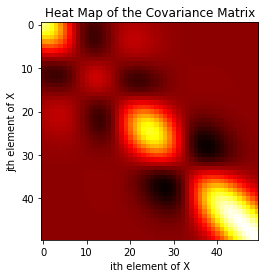

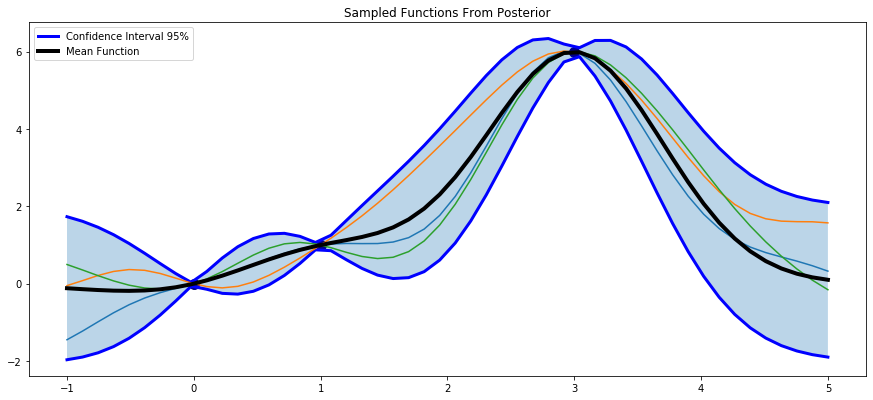

In [1]:
#Gaussian Process Regression

import numpy as np
import matplotlib.pyplot as plt

train_x = [0,1,3]
train_y = [0,1,6]
test_x = np.linspace(-1,5,50)

x = train_x
X = test_x


def dist(A,B):
    dist_matrix = np.zeros([len(A),len(B)])
    for i in range(len(A)):
        for j in range(len(B)):
            dist_matrix[i,j] = abs(A[i]-B[j])
    return dist_matrix

xx = dist(x,x)
Xx = dist(X,x)
xX = dist(x,X)
XX = dist(X,X)

l= 0.7
def k(d):
    return np.exp(-0.5*(l**-2)*(d**2))

kxx = k(xx)
kXx = k(Xx)
kxX = k(xX)
kXX = k(XX)
kxx_inv = np.linalg.inv(kxx)

mu = np.matmul(np.matmul(kXx, kxx_inv), train_y)

covar = kXX - np.matmul(np.matmul(kXx,kxx_inv),kxX)
var = np.diagonal(covar)
stdev = np.sqrt(var)

#Number of standard deviations, C in confidence interval
C = 2

if C ==1:
    percent = '68%'
elif C==2:
    percent = '95%'
elif C==3:
    percent = '99.7%'

lower_bound = np.zeros(len(mu))
upper_bound = np.zeros(len(mu))
for j in range(len(mu)):
    upper_bound[j] = mu[j]+C*stdev[j]
    lower_bound[j] = mu[j]-(C*stdev[j])

# #Scatter Plot
# plt.plot(train_x,train_y, marker = 'o',linestyle = '', color = 'blue', markersize = 10, label = 'Known Points')
# plt.plot(test_x,mu, marker = 'o', color = 'black', linestyle = '', label = 'Predicted Points', markersize = 4)
# plt.title('Scatter Plot')
# plt.legend()
# plt.show()

# #Function with error bounds
# plt.plot(train_x,train_y, marker = 'o',linestyle = '', color = 'darkblue', markersize = 10, label = 'Known Points')
# plt.plot(test_x,mu, color = 'black', linewidth = 3, label = 'Predicted Mean Function')
# plt.plot(test_x,upper_bound, color = 'blue', label = 'Confidence Interval '+percent)
# plt.plot(test_x,lower_bound, color = 'blue')
# plt.fill_between(test_x, lower_bound, upper_bound, where=None, alpha = 0.3, interpolate=False, step=None, data=None)
# plt.legend(loc = 'upper left')
# plt.show()

#Heatmap
plt.imshow(covar, cmap='hot', interpolation='nearest')
plt.title('Heat Map of the Covariance Matrix')
plt.xlabel('ith element of X')
plt.ylabel('jth element of X')
plt.show()

#Sampling functions from posterior
plt.figure(figsize=(15, 6.5))
plt.title('Sampled Functions From Posterior')
#Mean Function
plt.plot(train_x,train_y, marker = 'o',linestyle = '', color = 'darkblue', markersize = 10)
plt.plot(test_x,upper_bound, color = 'blue',linewidth = 3,label = 'Confidence Interval '+percent)
plt.plot(test_x,lower_bound, color = 'blue',linewidth = 3)
plt.fill_between(test_x, lower_bound, upper_bound, where=None, alpha = 0.3, interpolate=False, step=None, data=None)


Func_list = []
#Number of sampled functions = n
n = 3
np.random.seed(4)
for i in range(n):
    sampled_function = np.random.multivariate_normal(mu,covar) #Can be replicated using cholesky decomposition and random variables
    Func_list.append(sampled_function)
    plt.plot(test_x,sampled_function)
plt.plot(test_x,mu, color = 'black', linewidth = 4, label = 'Mean Function')
plt.legend(loc = 'upper left')
plt.show()

